<a href="https://colab.research.google.com/github/Shashank-89/CMPE-258/blob/main/assignment_1/assignment_1_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### CMPE-258 Assignment 1 Part 1

In [1]:
# Setting up and using fastbook library
!pip install -Uq fastbook
import tensorflow as tf
import fastbook
fastbook.setup_book()
from fastbook import *

     |████████████████████████████████| 727kB 7.8MB/s 
     |████████████████████████████████| 1.2MB 16.5MB/s 
     |████████████████████████████████| 51kB 8.3MB/s 
     |████████████████████████████████| 194kB 38.3MB/s 
     |████████████████████████████████| 61kB 9.2MB/s 
Mounted at /content/gdrive


### Image Classification (Cats or Dog) Example

In [2]:
# Downloading and extracting the dataset
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'
print(URLs.PETS)

https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet.tgz


In [6]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

Following is the Uploaded image!!


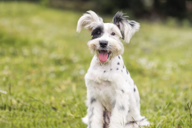

In [9]:
img = None
if(len(uploader.data) > 0):
    img = PILImage.create(uploader.data[0])
    print('Following is the Uploaded image!!')
    display(img.to_thumb(192))
else:
    print('Upload a file!! and run this cell again!!!')

In [11]:
#The image files in dataset which starts with upper case names are images of cats,
#and with lowercase are of dogs
def is_cat(file_name):
    return file_name[0].isupper()

def is_dog(file_name):
    return file_name[0].islower()

# passing is_dog as label_func
data_loader = ImageDataLoaders.from_name_func(path, get_image_files(path), valid_pct=0.2, seed=73, label_func=is_dog, item_tfms=Resize(224))
learn = cnn_learner(data_loader, resnet34, metrics=error_rate)
learn.fine_tune(1)
    

epoch,train_loss,valid_loss,error_rate,time
0,0.154365,0.020846,0.008119,00:46


epoch,train_loss,valid_loss,error_rate,time
0,0.067074,0.019499,0.008119,00:48


In [12]:
if(img is not None):
    is_dog,_,probs = learn.predict(img)
    print(f"Is this a dog?: {is_dog}.")
    print(f"Probability it's a dog: {probs[1].item():.6f}")
else:
    print('No sample passed for prediction!!!')

Is this a dog?: True.
Probability it's a dog: 0.999993


### Image Segmentation Example

In [13]:
path = untar_data(URLs.CAMVID_TINY)
print(URLs.CAMVID_TINY)

https://s3.amazonaws.com/fast-ai-sample/camvid_tiny.tgz


In [14]:
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,3.008190,13.273236,00:01


epoch,train_loss,valid_loss,time
0,3.279908,2.400740,00:01
1,2.468212,1.973924,00:01
2,2.078078,1.458474,00:01
3,1.806396,1.221214,00:01
4,1.590122,1.064363,00:01
5,1.411111,0.963555,00:01
6,1.266263,0.903827,00:01
7,1.154090,0.899844,00:01


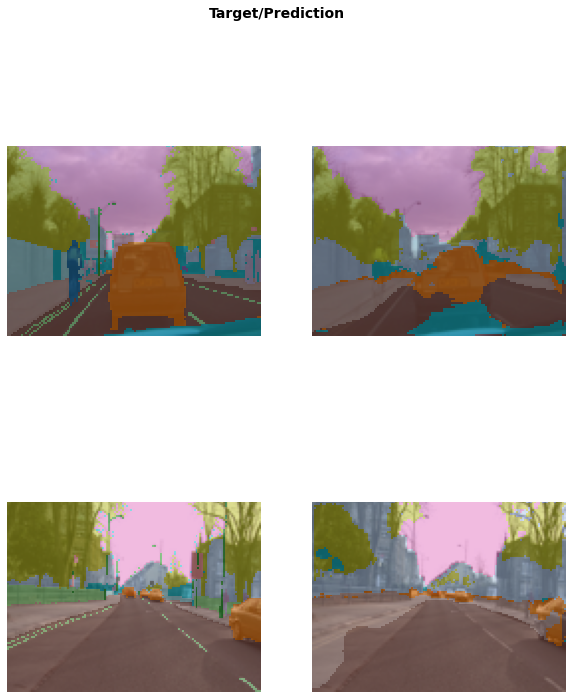

In [15]:
learn.show_results(max_n=8, figsize=(10,12))

### Sentiment Analysis Example

In [18]:
path = untar_data(URLs.AMAZON_REVIEWS_POLARITY)
print(URLs.AMAZON_REVIEWS_POLARITY)

https://s3.amazonaws.com/fast-ai-nlp/amazon_review_polarity_csv.tgz


In [19]:
from fastai.text.all import *

dls = TextDataLoaders.from_csv(path, csv_fname='test.csv', label_col=0, text_col=1)
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 0.01)

learn.predict("Its a great product!!")

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


epoch,train_loss,valid_loss,accuracy,time
0,0.526356,0.458275,0.775085,07:52


epoch,train_loss,valid_loss,accuracy,time
0,0.350434,0.321549,0.854348,08:28
1,0.314651,0.293534,0.870748,08:06
2,0.291211,0.280234,0.876511,08:00
3,0.243037,0.283666,0.877961,08:05


('2', tensor(1), tensor([0.0051, 0.9949]))

In [20]:
learn.predict("Worst buying experience!!")

('1', tensor(0), tensor([0.9978, 0.0022]))

As we can see, 2 is positive prediction and 1 is negative prediction, and the model seems to predict correctly

### Tabular Data Example

In [21]:
path = untar_data(URLs.ADULT_SAMPLE)
print(URLs.ADULT_SAMPLE)

https://s3.amazonaws.com/fast-ai-sample/adult_sample.tgz


In [23]:
from fastai.tabular.all import *
dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.376698,0.359322,0.830620,00:05
1,0.347697,0.353021,0.833845,00:05
2,0.352917,0.347759,0.837224,00:05


### Ratings Prediction

In [24]:
path = untar_data(URLs.ML_SAMPLE)
print(URLs.ML_SAMPLE)

https://s3.amazonaws.com/fast-ai-sample/movie_lens_sample.tgz


In [25]:
from fastai.collab import *
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,1.486801,1.460359,00:00


epoch,train_loss,valid_loss,time
0,1.343567,1.388174,00:00
1,1.214324,1.144284,00:00
2,0.947826,0.850148,00:00
3,0.765794,0.746689,00:00
4,0.675082,0.717041,00:00
5,0.637896,0.707875,00:00
6,0.623941,0.704078,00:00
7,0.625277,0.703759,00:00


In [26]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,65.0,33.0,3.0,3.154275
1,88.0,93.0,2.5,4.177274
2,77.0,70.0,3.0,3.836066
3,7.0,29.0,4.0,4.061379
4,23.0,68.0,2.5,3.163671
5,96.0,53.0,4.0,3.170951
6,7.0,89.0,4.0,3.686939
7,67.0,55.0,3.0,3.451559
8,49.0,15.0,4.0,4.219218
